# <font color = "green"> Introduction </font>

Welcome to this notebook on panoramic image stitching using OpenCV! Panoramas provide a captivating wide-angle view of a scene by seamlessly stitching multiple images together. In this notebook, we'll explore the process of creating panoramas step by step. By the end, you'll have a solid understanding of how to create stunning panoramas using OpenCV.

In [16]:
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image Reading and Preprocessing

In [17]:
# Read Images

imagefiles = glob.glob(f"../data/test_images{os.sep}*")
imagefiles.sort()

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

In [18]:
num_images

11

**Explanation:**
- **Image Loading**: We utilize the `glob.glob()` function to retrieve a list of file paths for all images in the "boat" directory. Sorting these paths ensures consistent processing order.
- **Image Processing**: For each image file path, we use `cv2.imread()` to load the image data. Since OpenCV reads images in BGR format, we convert them to RGB format using `cv2.cvtColor()`. The converted images are then appended to a list called `images`.
- **Counting Images**: After loading and converting all images, we determine the total number of images read by calculating the length of the `images` list. This count provides valuable information about the dataset's size and readiness for subsequent processing steps.

# Image Display

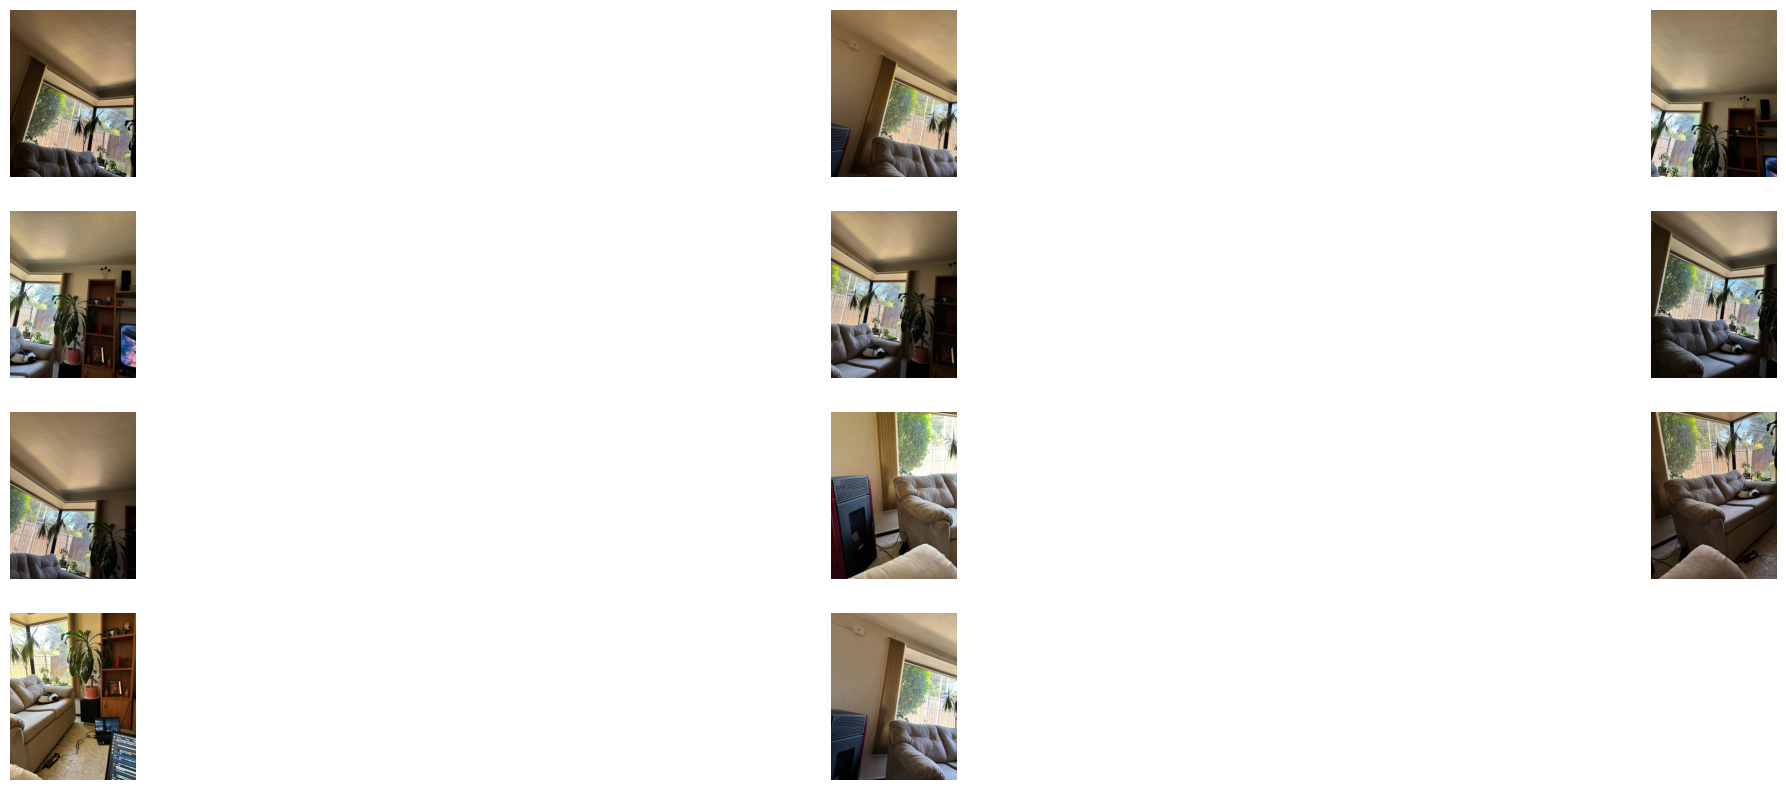

In [19]:
# Display Images
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i])
    
plt.show()

**Explanation:**

- **Grid Layout Setup**: We determine the layout of the subplot grid based on the number of images to be displayed. `num_cols` is set to 3, specifying the number of columns in the grid. We calculate the number of rows (`num_rows`) required to accommodate all images, using `math.ceil(num_images / num_cols)` to ensure that there are enough rows to display all images, even if there aren't enough to fill each column completely.
- **Displaying Each Image**: Within a loop iterating over each image index, we use `plt.subplot()` to create a subplot within the figure grid. The arguments `num_rows`, `num_cols`, and `i + 1` specify the subplot's position in the grid. We turn off the axis using `plt.axis("off")` to remove unnecessary axes ticks and labels. Finally, we use `plt.imshow()` to display the image within the subplot.

# Image Stitching

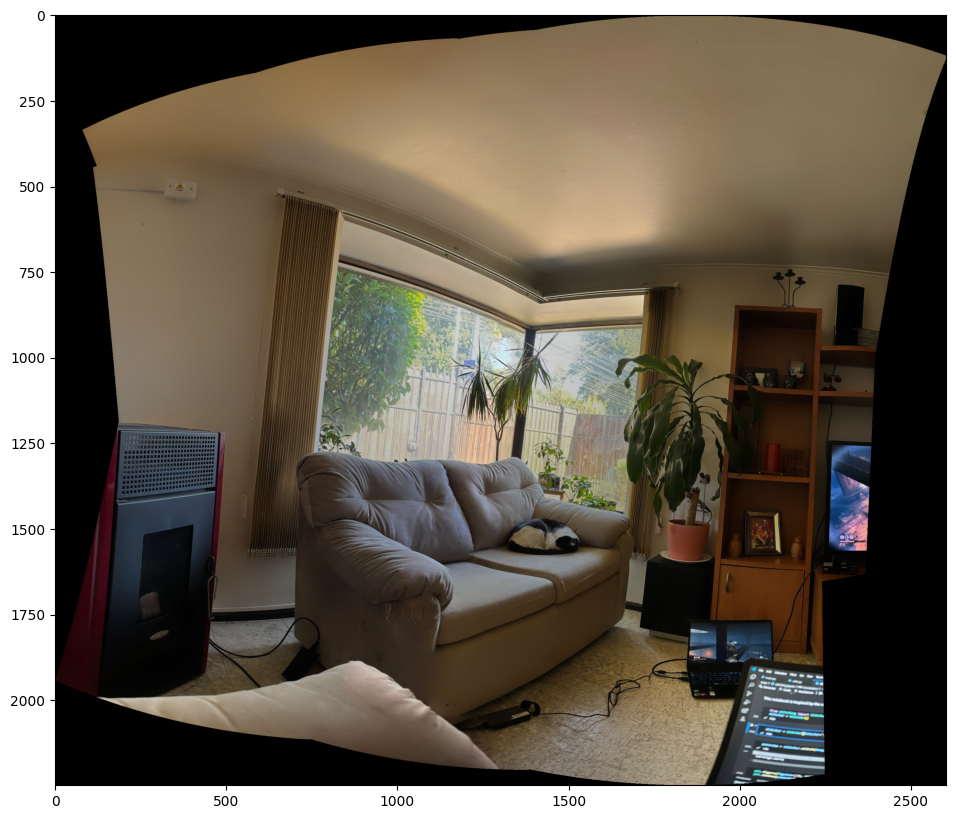

In [20]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)
else:
    print("Stitching failed!")

**Explanation:**

- **Stitcher Initialization**: We create a stitcher object using `cv2.Stitcher_create()`. This object is capable of stitching together multiple images to create a panorama.
- **Stitching Process**: We call the `stitch()` method of the stitcher object, passing the list of images (`images`) as input. This method attempts to stitch the images together to form a panorama.
- **Stitching Status Check**: The `stitch()` method returns two values: `status` and `result`. The `status` variable indicates the success or failure of the stitching process. A status of 0 (`cv2.Stitcher_OK`) indicates successful stitching.

# <font color = "red"> Conclusion </font>

In this notebook, we learned how to create stunning panoramic images using OpenCV. By reading, preprocessing, and stitching together multiple images, we were able to seamlessly blend them into captivating panoramas. Armed with this knowledge, we can now create immersive panoramic views of landscapes, architecture, and more, unlocking a world of creative possibilities.

This notebook is inspired by the concepts and techniques presented in this [video](https://youtu.be/v9JARVu74CI?si=Jqed4pJZqrIW5y83) by OpenCV University, which provided an excellent overview of these methods

In [21]:
from stitching import Stitcher
stitcher = Stitcher()

In [22]:
stitcher = Stitcher(detector="sift", confidence_threshold=0.1)

In [23]:
panorama = stitcher.stitch(imagefiles)

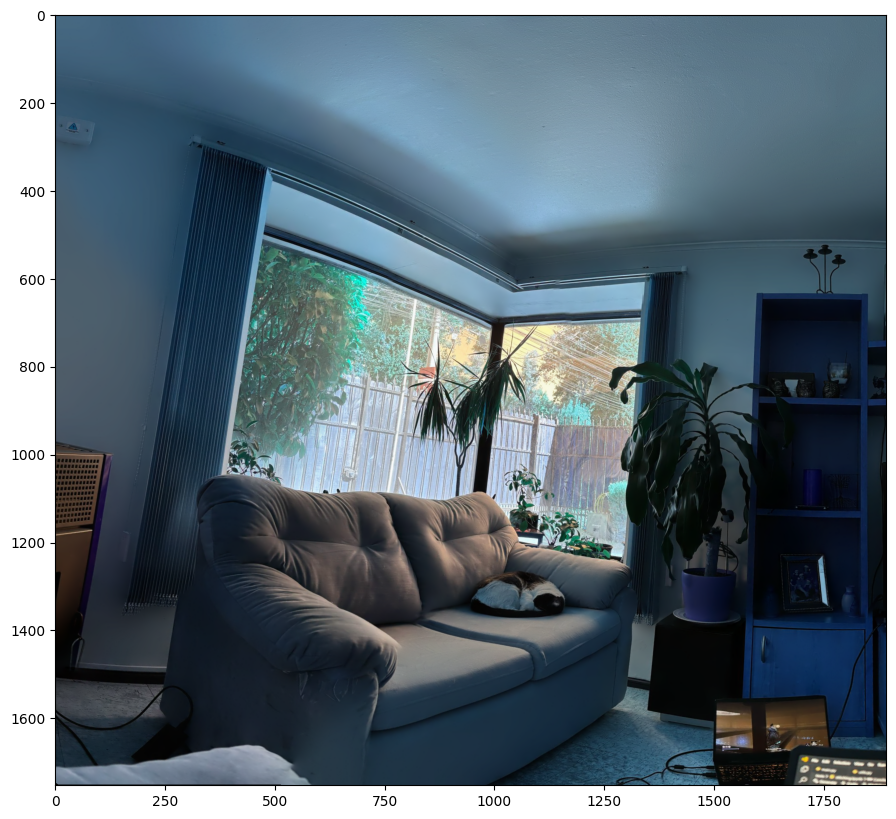

In [24]:
plt.figure(figsize=[30, 10])
plt.imshow(panorama)